In [2]:
import numpy as np
import random

def arr_random(N_):
    result_ = np.arange(1, N_+1) / N_
    np.random.shuffle(result_)
    return result_

def arr_sorted(N_, reverse_=False):
    result_ = np.arange(1, N_+1) / N_
    if reverse_:
        result_ = result_[::-1]
    return result_

def arr_sorted_about(N_, split_, reverse_=False):
    bin_ = N_ // split_
    amari_ = N_ % split_
    subarr_size_ = np.full(split_, bin_)
    subarr_size_[:amari_] += 1
    
    result_ = np.arange(1, N_+1) / N_
    
    base_ = 0
    for n in subarr_size_:
        np.random.shuffle(result_[base_:base_+n])
        base_ += n
    
    if reverse_:
        result_ = result_[::-1]
    return result_
    """
    result_ = []
    for i in range(len(subarr_size_)):
        for _ in range(subarr_size_[i]):
            result_.append(random.uniform(bin_*i, bin_*(i+1)))
    if reverse_:
        result_ = result_[::-1]
    result_ = np.array(result_) / N_
    return result_
    """

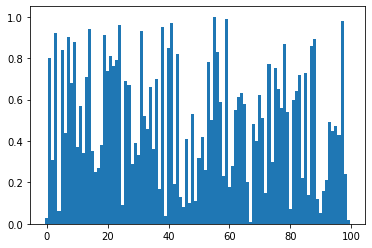

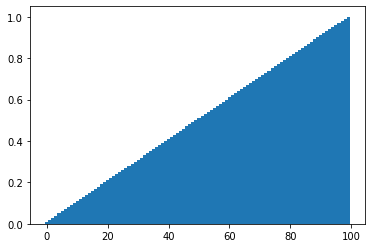

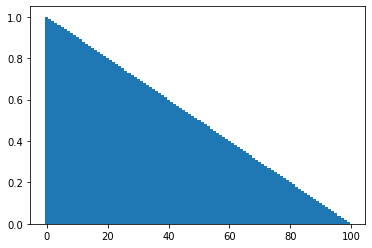

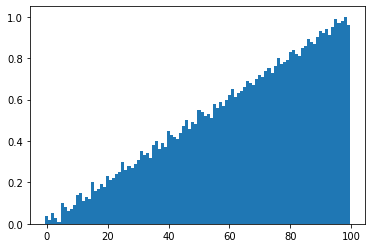

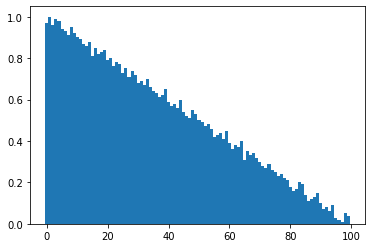

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 100
split = 20

def plot_bar(arr_):
    plt.bar(range(len(arr_)), arr_, width=1.0)
    plt.show()

plot_bar(arr_random(N))
plot_bar(arr_sorted(N))
plot_bar(arr_sorted(N, reverse_=True))
plot_bar(arr_sorted_about(N, split))
plot_bar(arr_sorted_about(N, split, reverse_=True))

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


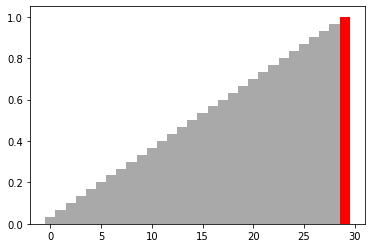

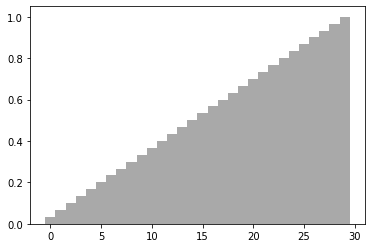

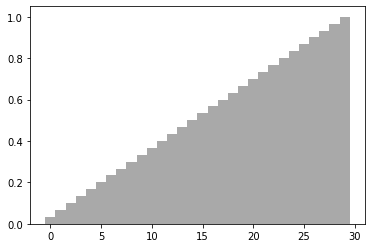

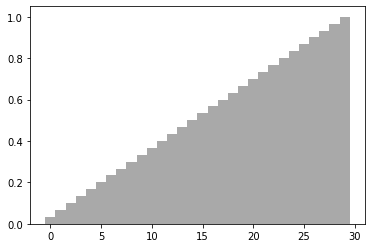

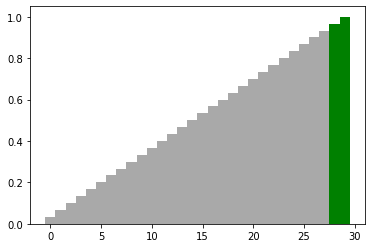

In [38]:
%matplotlib inline
#%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class SortAlgorithm:
    color_base = 'darkgray'
    color_search = 'green'
    color_mark = 'red'
    color_range = 'lightgreen'
    
    def sort(self, arr, file):
        self.fig = plt.figure()
        self.imgs = []
        self.n = len(arr)
        self.x = np.arange(self.n)
        self.arr = np.copy(arr)
        self.sort_array()
        ani = animation.ArtistAnimation(self.fig, self.imgs, interval=1, repeat=False)
        ani.save(file)
    
    def draw(self, i_search=[], i_mark=[], i_range=[]):
        color = [self.color_base] * self.n
        for i in i_range:
            color[i] = self.color_range
        for i in i_search:
            color[i] = self.color_search
        for i in i_mark:
            color[i] = self.color_mark
        im = plt.bar(self.x, self.arr, width=1.0, color=color)
        self.imgs.append(im)


class SelectionSort(SortAlgorithm):
    def sort_array(self):
        for i in range(self.n):
            v_min = self.arr[i]
            j_min = i
            for j in range(i+1, self.n):
                self.draw(i_search=[i, j], i_mark=[j_min])
                if v_min > self.arr[j]:
                    v_min = self.arr[j]
                    j_min = j
            self.draw(i_mark=[i, j_min])
            self.arr[i], self.arr[j_min] = self.arr[j_min], self.arr[i]


class BubbleSort(SortAlgorithm):
    def sort_array(self):
        for i in range(self.n):
            for j in range(self.n-i-1):
                self.draw(i_search=[j, j+1])
                if self.arr[j] > self.arr[j+1]:
                    self.arr[j], self.arr[j+1] = self.arr[j+1], self.arr[j]
        self.draw()


class InsertSort(SortAlgorithm):
    def sort_array(self):
        for i in range(self.n-1):
            j = i + 1
            while self.arr[j-1] > self.arr[j] and j > 0:
                self.draw(i_search=[i, j-1])
                self.arr[j], self.arr[j-1] = self.arr[j-1], self.arr[j]
                j -= 1
        self.draw()


class MergeSort(SortAlgorithm):
    def sort_array(self):
        self.partial_sort(0, len(self.arr)-1)
    
    def partial_sort(self, i_from, i_to):
        if i_to - i_from < 1:
            return
        else:
            i_middle = (i_from + i_to) // 2
            self.partial_sort(i_from, i_middle)
            self.partial_sort(i_middle+1, i_to)
            buff = []
            i_left, i_right = i_from, i_middle + 1
            while i_left <= i_middle and i_right <= i_to:
                self.draw(i_search=[i_left, i_right], i_range=range(i_from, i_to+1))
                if self.arr[i_left] < self.arr[i_right]:
                    buff.append(self.arr[i_left])
                    i_left += 1
                else:
                    buff.append(self.arr[i_right])
                    i_right += 1
            while i_left <= i_middle:
                self.draw(i_search=[i_left])
                buff.append(self.arr[i_left])
                i_left += 1
            while i_right <= i_to:
                self.draw(i_search=[i_right])
                buff.append(self.arr[i_right])
                i_right += 1
            self.arr[i_from:i_to+1] = buff
            self.draw()
            
            
class QuickSort(SortAlgorithm):
    def sort_array(self):
        self.partial_sort(0, len(self.arr)-1)
    
    def partial_sort(self, i_from, i_to):
        if i_from >= i_to:
            return
        
        base = np.median(self.arr[np.random.choice(range(i_from, i_to+1), 3)])
        i_left = i_from
        i_right = i_to
        while i_left < i_right:
            self.draw(i_search=[i_left, i_right], i_range=range(i_from, i_to+1))
            if base <= self.arr[i_left]:
                if self.arr[i_right] <= base:
                    self.draw(i_mark=[i_left, i_right], i_range=range(i_from, i_to+1))
                    self.arr[i_left], self.arr[i_right] = self.arr[i_right], self.arr[i_left]
                else:
                    i_right -= 1
            else:
                i_left += 1
        self.partial_sort(i_from, i_left)
        self.partial_sort(i_right+1, i_to)


N = 30
a = arr_random(N)
SelectionSort().sort(a, 'selection.gif')
BubbleSort().sort(a, 'bubble.gif')
InsertSort().sort(a, 'insert.gif')
MergeSort().sort(a, 'merge.gif')
QuickSort().sort(a, 'quick.gif')